# 서울시 생활인구
## 서울 생활인구 현황 (2022.10.05. 기준)
### url: https://data.seoul.go.kr/dataVisual/seoul/seoulLivingPopulation.do
### 서울시 생활인구란? 
    - 서울시와 KT가 공공빅데이터와 통신데이터를 이용하여 추계한 서울의 특정지역, 특정시점에 존재하는 모든 인구

#### 데이터: 행정동 단위 서울 생활인구(내국인)
    - url: https://data.seoul.go.kr/dataList/OA-14979/F/1/datasetView.do
    - 설명: 서울시가 보유한 공공데이터와 통신데이터로 측정한 특정시점에 서울의 특정 지역에 존재하는 인구 중 내국인

<!-- <br> -->



※ 개인정보 비 식별화를 위하여 ‘3명’ 이하인 경우 “ * ” 처리


In [1]:
import os
import glob
import pandas as pd
import numpy as np

In [2]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [3]:
import matplotlib.pyplot  as  plt
from matplotlib  import  rc

rc('font', family='AppleGothic') # 한글 사용가능
plt.rcParams['axes.unicode_minus'] = False # 마이너스 사용가능

In [4]:
import plotly.express as px

In [5]:
df_dong = pd.read_csv("서울_월별_일일평균생활인구.csv", index_col=0)

In [23]:
pd.options.display.float_format = '{:,.0f}'.format

# 총 일평균 생활인구

## 행정동별 일일평균 생활인구

In [35]:
df_dong_day = df_dong.pivot_table("일일평균생활인구", index=["시군구명","행정동명"],aggfunc = 'mean').sort_values(by=["일일평균생활인구"],ascending=False)
df_dong_day.reset_index(inplace=True)
df_dong_day

,시군구명,행정동명,일일평균생활인구
0,강남구,역삼1동,"94,446"
1,영등포구,여의동,"81,249"
2,마포구,서교동,"69,184"
3,은평구,진관동,"63,152"
4,서초구,서초3동,"61,819"
...,...,...,...
419,종로구,삼청동,"5,061"
420,종로구,창신3동,"4,950"
421,강동구,둔촌1동,"4,603"
422,양천구,신월6동,"4,552"


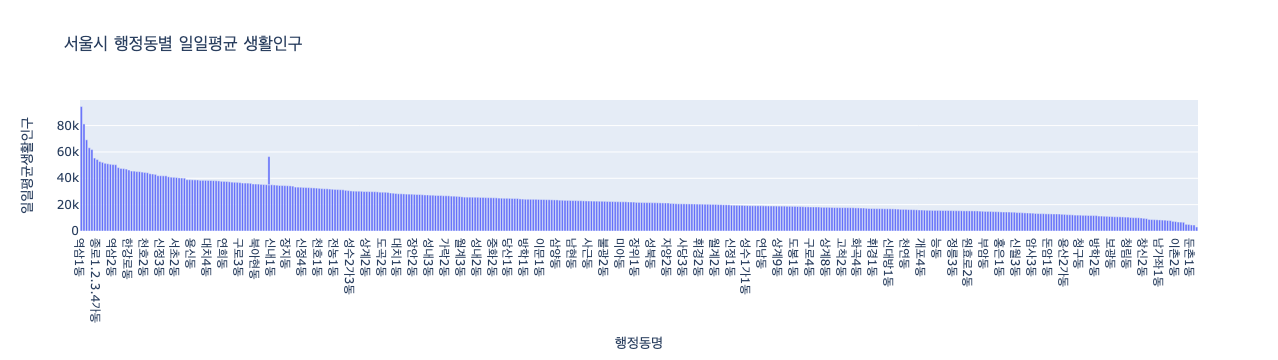

In [47]:
fig_dong_day = px.bar(
    df_dong_day, 
    x=df_dong_day.행정동명, 
    y=df_dong_day.일일평균생활인구, 
    hover_data=[df_dong_day.행정동명, df_dong_day.일일평균생활인구],
    title='서울시 행정동별 일일평균 생활인구'
)
fig_dong_day.show()

## 구별 일일생황평균

In [36]:
df_gu_day = df_dong.pivot_table("일일평균생활인구", index="시군구명",aggfunc = 'mean').sort_values(by=["일일평균생활인구"],ascending=False)
df_gu_day.reset_index(inplace=True)
df_gu_day

,시군구명,일일평균생활인구
0,강남구,"35,029"
1,서초구,"29,967"
2,강동구,"27,950"
3,마포구,"27,520"
4,송파구,"27,376"
5,은평구,"27,200"
6,강서구,"26,931"
7,노원구,"26,385"
8,영등포구,"25,420"
9,구로구,"25,404"


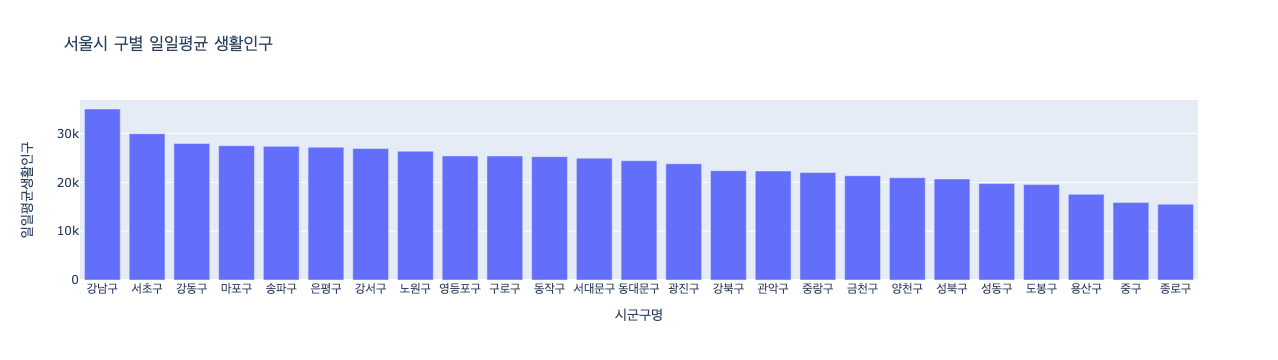

In [46]:
fig_gu_day = px.bar(
    df_gu_day, 
    x=df_gu_day.시군구명, 
    y=df_gu_day.일일평균생활인구, 
    hover_data=[df_gu_day.시군구명, df_gu_day.일일평균생활인구],
    title='서울시 구별 일일평균 생활인구' # Title 
)
fig_gu_day.show()

# 순위 분석 : 각 평균에 따른 합 비교

In [26]:
age_lp=df_dong.filter(regex='\d|시군구명|행정동명')
age_lp

,시군구명,행정동명,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상
0,종로구,청운효자동,"1,123","1,616","2,760","2,712","3,152","2,562","1,562","1,966"
1,종로구,청운효자동,"1,297","2,005","2,475","2,655","3,230","2,631","1,566","1,951"
2,종로구,청운효자동,"1,173","1,644","3,060","2,853","3,200","2,699","1,611","1,982"
3,종로구,청운효자동,"1,338","2,029","2,771","2,789","3,267","2,698","1,606","1,959"
4,종로구,청운효자동,"1,122","1,588","2,572","2,476","3,002","2,520","1,556","1,938"
...,...,...,...,...,...,...,...,...,...,...
10171,강동구,둔촌2동,"2,389","2,737","3,107","3,782","4,026","4,088","3,467","3,775"
10172,강동구,둔촌2동,"2,205","2,583","3,008","3,637","3,960","4,098","3,353","3,412"
10173,강동구,둔촌2동,"2,361","2,745","3,076","3,762","4,024","4,137","3,403","3,779"
10174,강동구,둔촌2동,"2,278","2,595","2,921","3,652","4,035","4,091","3,382","3,448"


# 구별 1위

In [27]:
a=age_lp.groupby(["시군구명"]).mean()
a["1위"]=a.idxmax(axis=1)
a

,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상,1위
시군구명,,,,,,,,,
강남구,"2,261","3,848","5,300","6,564","6,755","4,620","2,959","2,721",40대
강동구,"2,251","2,767","3,217","4,315","4,678","4,175","3,393","3,153",40대
강북구,"1,405","1,825","3,029","2,887","3,397","3,599","2,820","3,428",50대
강서구,"2,090","2,179","3,761","4,981","4,480","3,639","2,926","2,875",30대
관악구,"1,083","1,487","5,092","4,175","3,219","2,820","2,147","2,303",20대
광진구,"1,476","2,099","4,606","3,985","3,669","3,414","2,399","2,165",20대
구로구,"1,949","1,936","3,310","4,385","4,342","3,849","2,915","2,718",30대
금천구,"1,100","1,249","3,385","4,111","3,586","3,440","2,434","2,055",30대
노원구,"1,984","3,238","3,499","3,260","4,075","4,028","3,054","3,247",40대


# 구별 모든 순위


In [28]:
a=age_lp.groupby(["시군구명"]).mean()
a_list=a.apply(np.argsort,axis=1)
a_cols=a.columns.to_numpy()[a_list.values[:,::-1]]
a[['1위','2위','3위','4위','5위','6위','7위','8위']]=pd.DataFrame(a_cols, index=a.index)
a

,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상,1위,2위,3위,4위,5위,6위,7위,8위
시군구명,,,,,,,,,,,,,,,,
강남구,"2,261","3,848","5,300","6,564","6,755","4,620","2,959","2,721",40대,30대,20대,50대,10대,60대,70세 이상,10세 이하
강동구,"2,251","2,767","3,217","4,315","4,678","4,175","3,393","3,153",40대,30대,50대,60대,20대,70세 이상,10대,10세 이하
강북구,"1,405","1,825","3,029","2,887","3,397","3,599","2,820","3,428",50대,70세 이상,40대,20대,30대,60대,10대,10세 이하
강서구,"2,090","2,179","3,761","4,981","4,480","3,639","2,926","2,875",30대,40대,20대,50대,60대,70세 이상,10대,10세 이하
관악구,"1,083","1,487","5,092","4,175","3,219","2,820","2,147","2,303",20대,30대,40대,50대,70세 이상,60대,10대,10세 이하
광진구,"1,476","2,099","4,606","3,985","3,669","3,414","2,399","2,165",20대,30대,40대,50대,60대,70세 이상,10대,10세 이하
구로구,"1,949","1,936","3,310","4,385","4,342","3,849","2,915","2,718",30대,40대,50대,20대,60대,70세 이상,10세 이하,10대
금천구,"1,100","1,249","3,385","4,111","3,586","3,440","2,434","2,055",30대,40대,50대,20대,60대,70세 이상,10대,10세 이하
노원구,"1,984","3,238","3,499","3,260","4,075","4,028","3,054","3,247",40대,50대,20대,30대,70세 이상,10대,60대,10세 이하


# 행정동별 1위


In [29]:
a=age_lp.groupby(["시군구명","행정동명"]).mean()
a["1위"]=a.idxmax(axis=1)
a

10세 이하   10대   20대    30대   40대   50대   60대  70세 이상   1위
시군구명 행정동명                                                          
강남구  개포1동     731   953   694  1,224 1,663 1,346 1,064     983  40대
     개포2동   1,850 3,779 2,318  2,865 4,573 3,792 2,813   2,829  40대
     개포4동   1,126 1,677 1,853  2,594 2,804 2,583 1,871   1,406  40대
     논현1동   1,050 1,632 9,439 10,726 7,713 4,757 2,918   2,591  30대
     논현2동   1,826 1,932 7,450 10,137 8,286 4,960 2,826   2,784  30대
...           ...   ...   ...    ...   ...   ...   ...     ...  ...
중랑구  상봉2동   1,063 1,245 4,968  5,238 3,885 4,310 3,070   2,646  30대
     신내1동   3,774 3,330 3,810  4,773 5,429 5,475 4,323   4,147  50대
     신내2동   1,275 1,750 1,934  2,507 2,577 2,864 2,344   2,466  50대
     중화1동   1,538 1,447 2,115  2,577 2,354 2,611 2,191   2,252  50대
     중화2동   1,414 1,480 3,240  3,737 3,618 4,462 3,577   3,668  50대

[424 rows x 9 columns]

# 행정동별 모든 순위

In [30]:
a=age_lp.groupby(["시군구명","행정동명"]).mean()
a_list=a.apply(np.argsort,axis=1)
a_cols=a.columns.to_numpy()[a_list.values[:,::-1]]
a[['1위','2위','3위','4위','5위','6위','7위','8위']]=pd.DataFrame(a_cols, index=a.index)
a

10세 이하   10대   20대    30대   40대   50대   60대  70세 이상   1위   2위  \
시군구명 행정동명                                                                  
강남구  개포1동     731   953   694  1,224 1,663 1,346 1,064     983  40대  50대   
     개포2동   1,850 3,779 2,318  2,865 4,573 3,792 2,813   2,829  40대  50대   
     개포4동   1,126 1,677 1,853  2,594 2,804 2,583 1,871   1,406  40대  30대   
     논현1동   1,050 1,632 9,439 10,726 7,713 4,757 2,918   2,591  30대  20대   
     논현2동   1,826 1,932 7,450 10,137 8,286 4,960 2,826   2,784  30대  40대   
...           ...   ...   ...    ...   ...   ...   ...     ...  ...  ...   
중랑구  상봉2동   1,063 1,245 4,968  5,238 3,885 4,310 3,070   2,646  30대  20대   
     신내1동   3,774 3,330 3,810  4,773 5,429 5,475 4,323   4,147  50대  40대   
     신내2동   1,275 1,750 1,934  2,507 2,577 2,864 2,344   2,466  50대  40대   
     중화1동   1,538 1,447 2,115  2,577 2,354 2,611 2,191   2,252  50대  30대   
     중화2동   1,414 1,480 3,240  3,737 3,618 4,462 3,577   3,668  50대  30대   

               3위      4위      5위      6위      7위      8위  
시군구명 행정동명                                                  
강남구  개포1동     30대     60대  70세 이상     10대  10세 이하     20대  
     개포2동     10대     30대  70세 이상     60대     20대  10세 이하  
     개포4동     50대     60대     20대     10대  70세 이상  10세 이하  
     논현1동     40대     50대     60대  70세 이상     10대  10세 이하  
     논현2동     20대     50대     60대  70세 이상     10대  10세 이하  
...           ...     ...     ...     ...     ...     ...  
중랑구  상봉2동     50대     40대     60대  70세 이상     10대  10세 이하  
     신내1동     30대     60대  70세 이상     20대  10세 이하     10대  
     신내2동     30대  70세 이상     60대     20대     10대  10세 이하  
     중화1동     40대  70세 이상     60대     20대  10세 이하     10대  
     중화2동  70세 이상     40대     60대     20대     10대  10세 이하  

[424 rows x 16 columns]

# 지도 시각화

In [49]:
import folium


'0.13.0'

In [ ]:
center = [37.541, 126.986]
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap']

In [ ]:
m = folium.Map(
    location = [center[0], center[1]],
    zoom_start = 12,
    tiles = tiles[0]
)